In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [4]:
#%matplotlib inline

In [5]:
writeDir = "write/"

fileName = "Steele2020_Pancreas"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

# Read In Data

In [7]:
inDir = f'data/{fileName}'
inputCellsFile = f'{inDir}/Cells.csv'
inputMtxFile = f'{inDir}/Exp_data_UMIcounts.mtx'
inputGenesFile = f'{inDir}/Genes.txt'
inMetaFile = f'{inDir}/Meta-data.csv'

In [8]:
adata = sc.read_mtx(inputMtxFile).T
adata

AnnData object with n_obs × n_vars = 48570 × 32738

In [9]:
cells =  pd.read_table(inputCellsFile, delimiter=",", index_col=0)
cells

,sample,cell_type,complexity
cell_name,,,
PDAC_TISSUE_1_AAACGAAAGTGGAAAG-1,PDAC_TISSUE_1,NaN,267
PDAC_TISSUE_1_AAACGAAGTAGGGTAC-1,PDAC_TISSUE_1,Malignant,4630
PDAC_TISSUE_1_AAACGAAGTCATAGTC-1,PDAC_TISSUE_1,Malignant,7961
PDAC_TISSUE_1_AAACGCTGTAATCAGA-1,PDAC_TISSUE_1,NaN,158
PDAC_TISSUE_1_AAAGAACCATTAAAGG-1,PDAC_TISSUE_1,Macrophage,4032
...,...,...,...
PDAC_TISSUE_16_TTTCCTCTCTGGTATG-1,PDAC_TISSUE_16,Macrophage,2726
PDAC_TISSUE_16_TTTGCGCGTAGCGTCC-1,PDAC_TISSUE_16,Malignant,6013
PDAC_TISSUE_16_TTTGGTTCATGCATGT-1,PDAC_TISSUE_16,Fibroblast,3309


In [10]:
genes =  pd.read_table(inputGenesFile, delimiter=",", index_col=0, header=None)
genes.index.names = ['genes']
genes

""
genes
MIR1302-10
FAM138A
OR4F5
RP11-34P13.7
RP11-34P13.8
...
AC145205.1
BAGE5
CU459201.1


In [11]:
meta =  pd.read_table(inMetaFile, delimiter=",", index_col=0, header=0)
meta

,technology,n_cells,patient,cancer_type,sex,age,smoking_status,PY,diagnosis_recurrence,disease_extent,...,targeted_rx_response,ICB_exposed,ICB_response,ET_exposed,ET_response,time_end_of_rx_to_sampling,post_sampling_rx_exposed,post_sampling_rx_response,PFS_DFS,OS
sample,,,,,,,,,,,,,,,,,,,,,
PDAC_TISSUE_1,10x,1633,PDAC_TISSUE_1,Pancreatic Ductal Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_10,10x,1464,PDAC_TISSUE_10,Pancreatic Ductal Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_11A,10x,4333,PDAC_TISSUE_11A,Pancreatic Ductal Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_11B,10x,2308,PDAC_TISSUE_11B,Pancreatic Ductal Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_12,10x,1668,PDAC_TISSUE_12,Pancreatic Ductal Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_13,10x,5108,PDAC_TISSUE_13,Pancreatic Ductal Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_15,10x,3093,PDAC_TISSUE_15,Pancreatic Ductal Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_16,10x,962,PDAC_TISSUE_16,Pancreatic Ductal Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_2,10x,1791,PDAC_TISSUE_2,Pancreatic Ductal Adenocarcinoma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
meta.iloc[:,10:20]

,AJCC_T,AJCC_N,AJCC_M,AJCC_stage,sample_primary_met,size,site,histology,additional_tumor_characterisics,grade
sample,,,,,,,,,,
PDAC_TISSUE_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_11A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_11B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PDAC_TISSUE_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
adata.obs = cells
adata.var = genes
adata

AnnData object with n_obs × n_vars = 48570 × 32738
    obs: 'sample', 'cell_type', 'complexity'

In [14]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [17]:
adata = adata[adata.obs.cell_type=="Malignant"]
adata

View of AnnData object with n_obs × n_vars = 7874 × 32738
    obs: 'sample', 'cell_type', 'complexity'

# QC

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


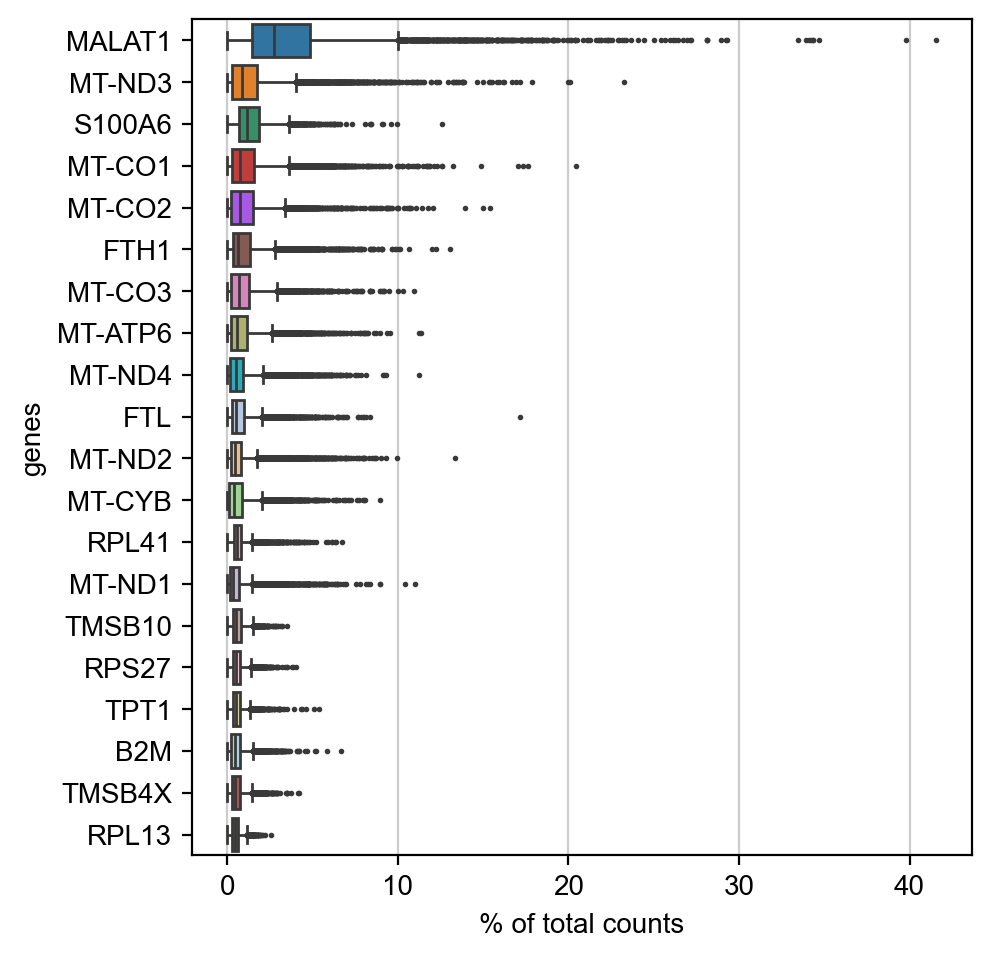

In [18]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_2158746/3542297969.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


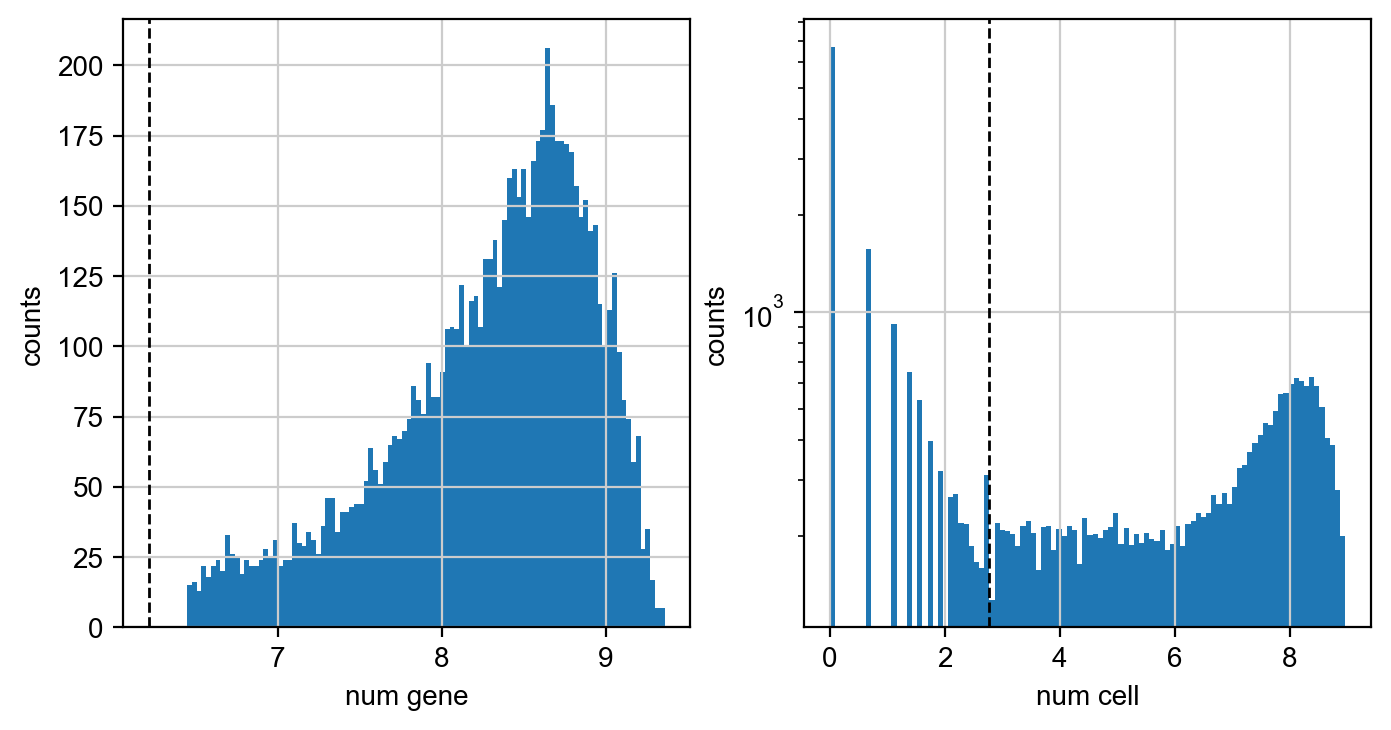

In [19]:
valX = adata.X>0
minGenes=500
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [20]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 12746 genes that are detected in less than 15 cells


In [21]:
adata = adata[:,np.logical_not(adata.var_names=="MALAT1")]

## Mito QC

In [28]:
for g in adata.var_names:
    if "MT-" == g[:2]:
        print(g)

In [23]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/tmp/ipykernel_2158746/2933791377.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


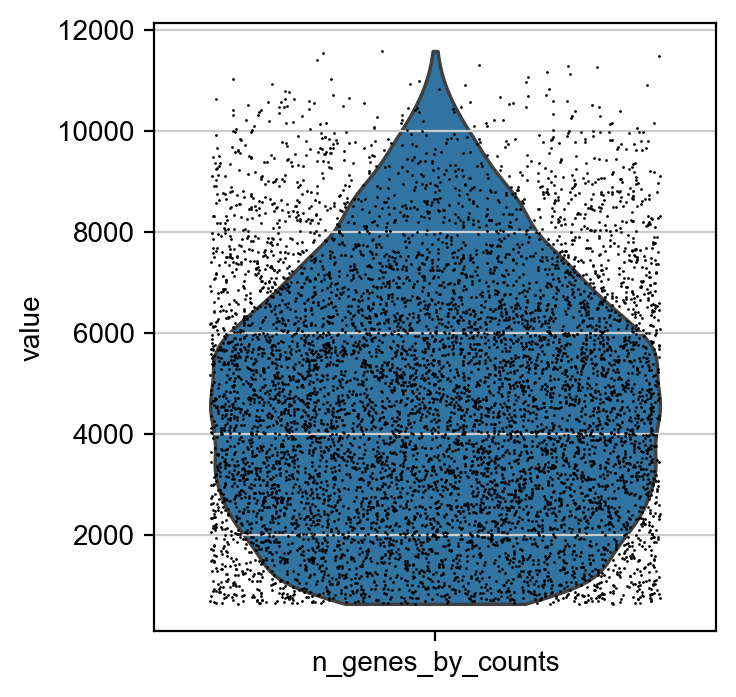

In [24]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


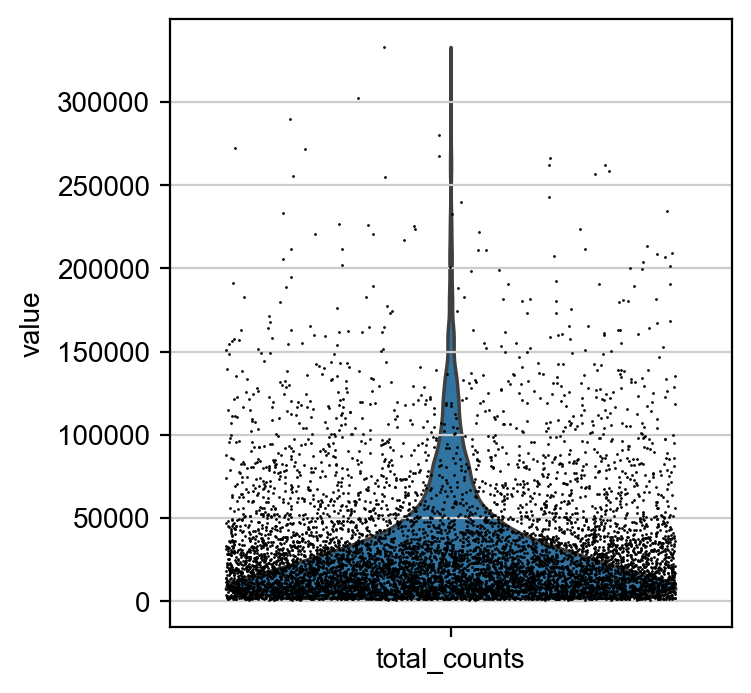

In [25]:
sc.pl.violin(adata, ['total_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


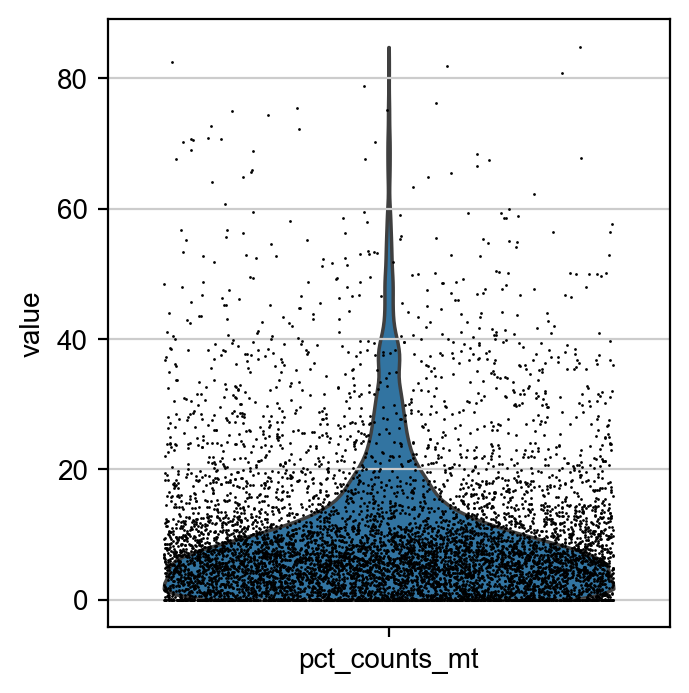

In [26]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

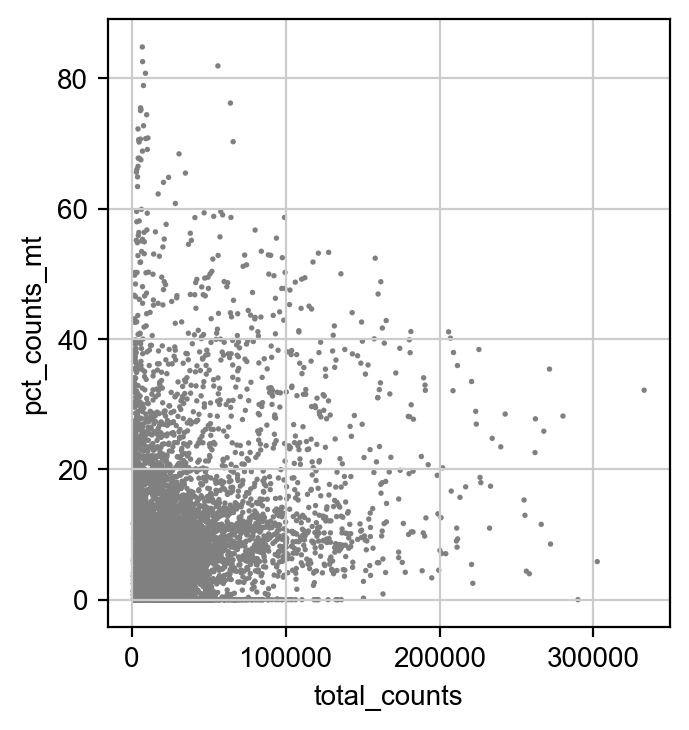

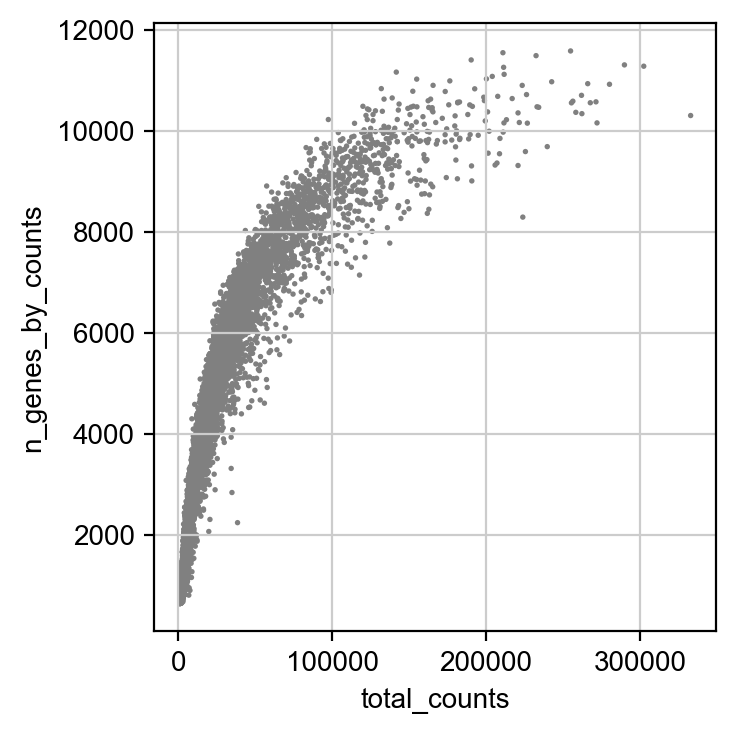

In [27]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [29]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.total_counts < 100000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

save post QC scanpy

In [30]:
adata

View of AnnData object with n_obs × n_vars = 6346 × 19991
    obs: 'sample', 'cell_type', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [31]:
resultsFileQC

'write/Steele2020_Pancreas_QC.h5ad'

In [32]:
adata.write(resultsFileQC)

# Analysis

In [33]:
resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

Set figure parameters

In [34]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [35]:
adata = sc.read(resultsFileQC)
adata

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 6346 × 19991
    obs: 'sample', 'cell_type', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [36]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [37]:
sc.pp.log1p(adata)

In [38]:
sc.pp.highly_variable_genes(adata)#, flavor = "seurat", n_top_genes=2000)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


1863


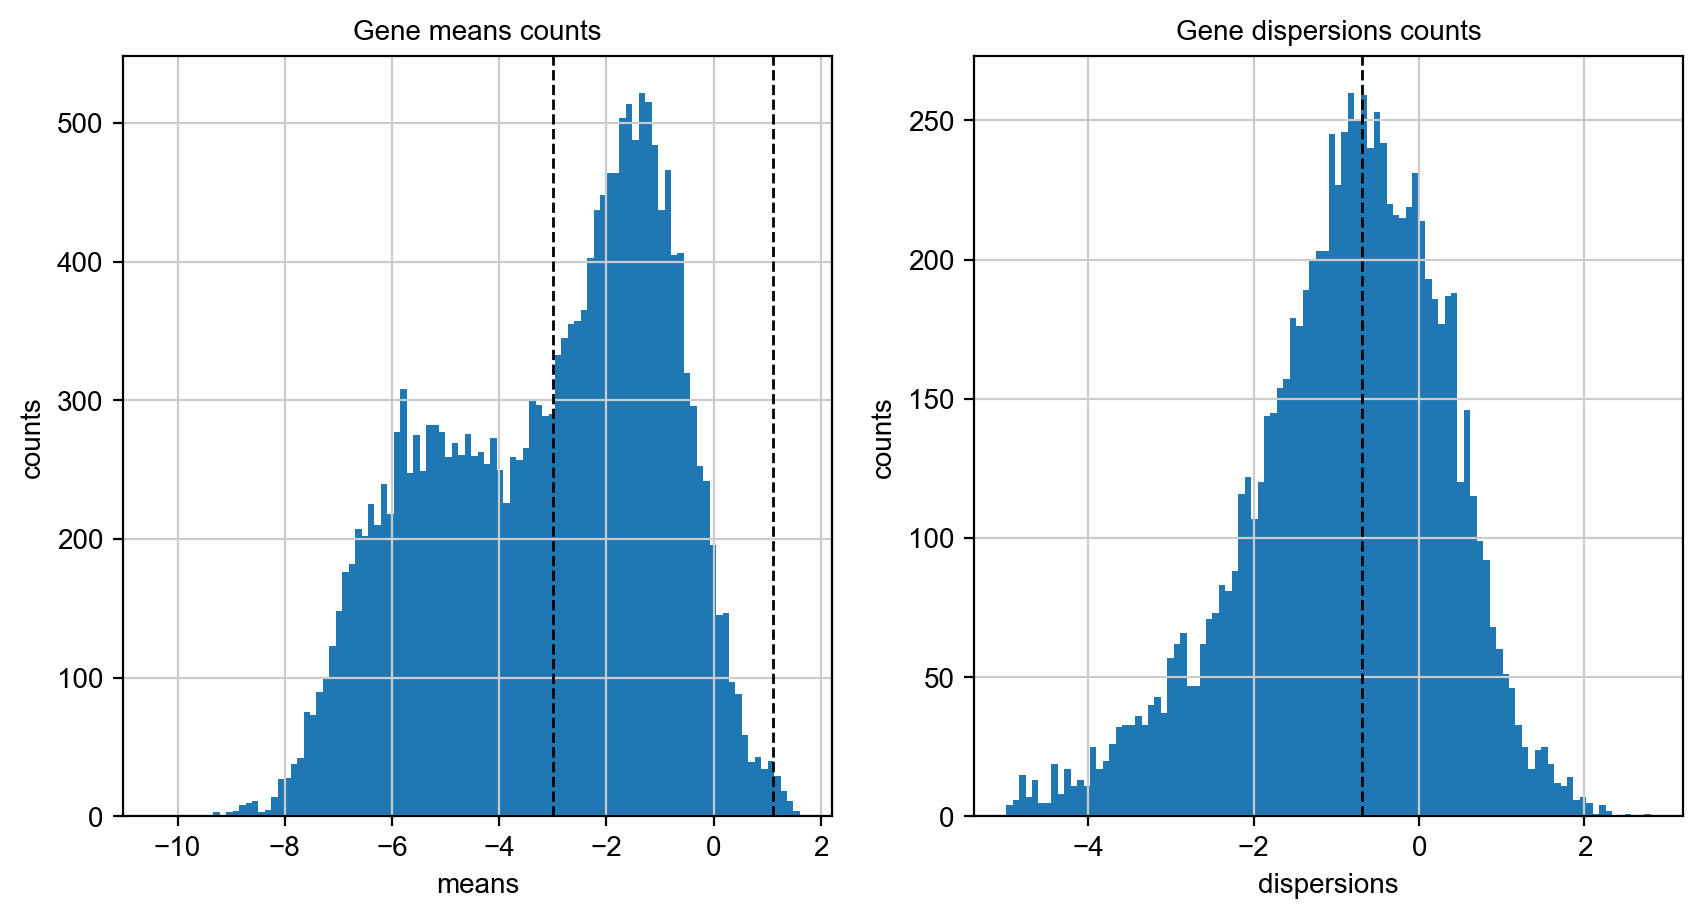

In [41]:
minMean = 0.05
maxMean = 3
minDisp = 0.5

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = adata.var[["means"]][adata.var[["means"]] > np.exp(-14)]#adata.var[["means"]],
axs[0].hist(np.log(means), bins=100)#, log=True),
axs[0].axvline(np.log(minMean), color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(np.log(maxMean), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Gene means counts')
axs[0].set_xlabel('means')
axs[0].set_ylabel('counts')

dispNorm = adata.var[["dispersions_norm"]][adata.var[["dispersions_norm"]] > np.exp(-5)]#adata.var[["means"]],
axs[1].hist(np.log(dispNorm), bins=100)#, log=True),
axs[1].axvline(np.log(minDisp), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Gene dispersions counts')
axs[1].set_xlabel('dispersions')
axs[1].set_ylabel('counts')

sc.pp.highly_variable_genes(adata, min_disp=minDisp, min_mean=minMean, max_mean=maxMean)
print(sum(adata.var.highly_variable))

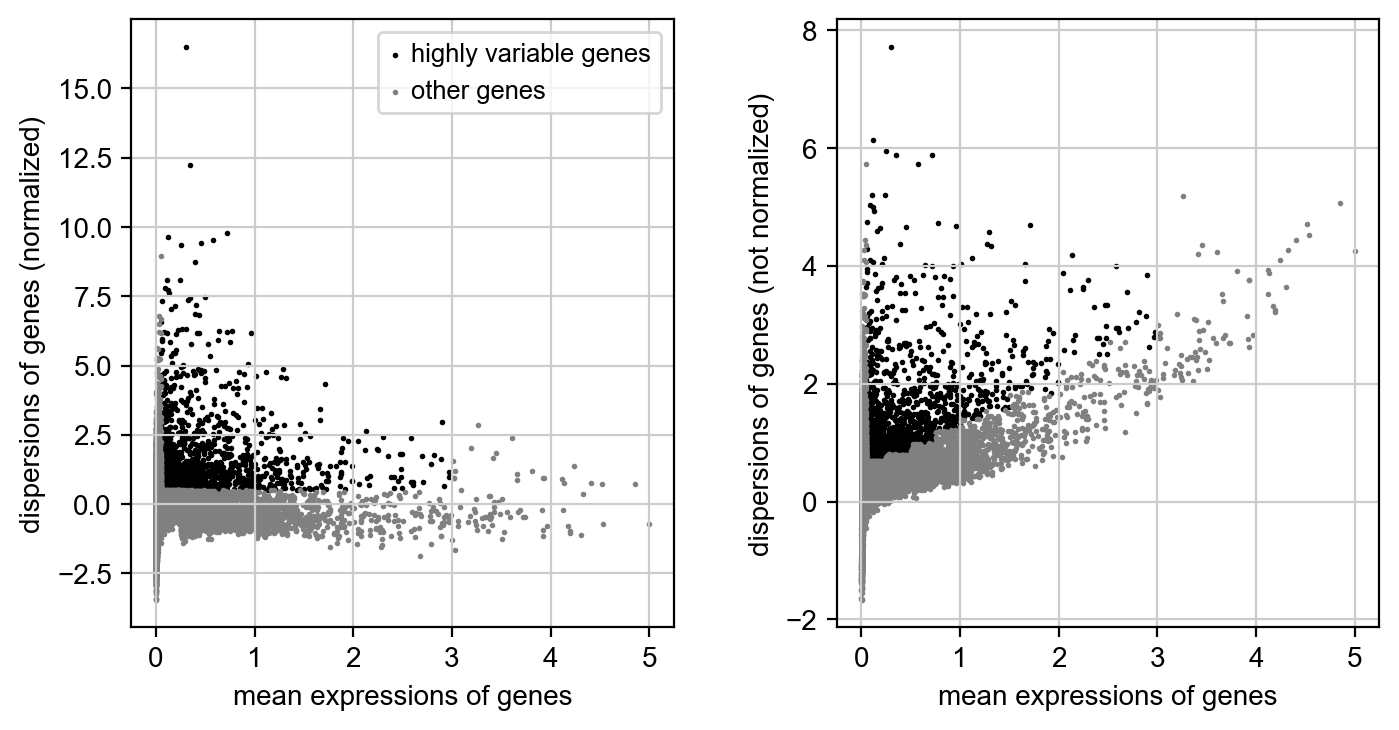

In [42]:
sc.pl.highly_variable_genes(adata)

In [43]:
#for inGene in adata.var[-8:].index.tolist():
#    adata.var.loc[inGene,"highly_variable"] = False

In [44]:
adata.raw = adata

In [45]:
#adata = adata[:, adata.var.highly_variable]
adata = adata[:, np.logical_and(adata.var.highly_variable, np.logical_not(adata.var.mt))]

In [46]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [47]:
#sc.pp.scale(adata, max_value=10)

In [48]:
sc.tl.pca(adata, n_comps = 100, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:01)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


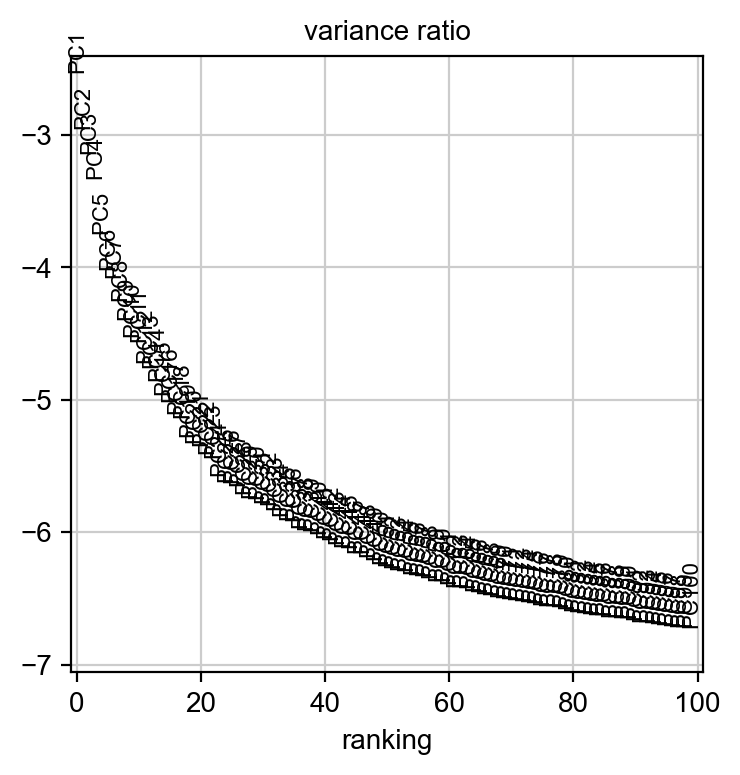

In [49]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100, log=True)

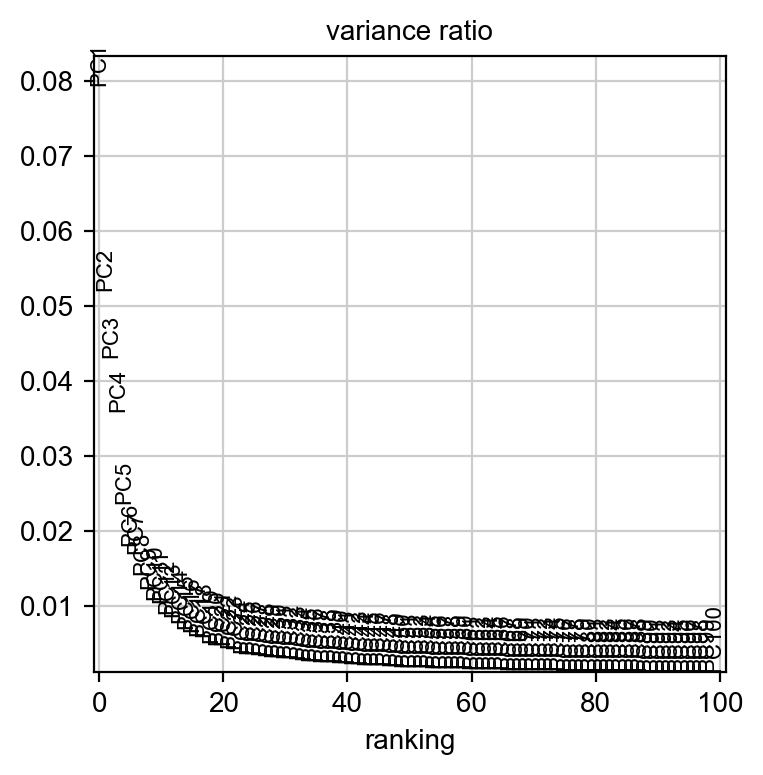

In [50]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100)

In [51]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [52]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [53]:
sc.tl.leiden(adata, resolution=0.25)

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [54]:
adata.obs

,sample,cell_type,complexity,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,leiden
cell_name,,,,,,,,,,,,,
PDAC_TISSUE_1_AAACGAAGTCATAGTC-1,PDAC_TISSUE_1,Malignant,7961,7995,7985,71376.0,31.038444,40.701356,50.543600,62.542031,10436.0,14.621161,8
PDAC_TISSUE_1_AAAGGGCAGTGAATAC-1,PDAC_TISSUE_1,Malignant,6691,6719,6716,50282.0,26.920170,37.878366,49.574400,62.895271,3135.0,6.234836,8
PDAC_TISSUE_1_AACAAGAGTGTATCCA-1,PDAC_TISSUE_1,Malignant,6214,6232,6223,23939.0,15.932161,22.498851,31.379757,46.075442,183.0,0.764443,8
PDAC_TISSUE_1_AACGGGAGTTCCTAAG-1,PDAC_TISSUE_1,Malignant,7704,7730,7717,84849.0,28.681540,39.777723,51.545687,65.867600,7745.0,9.127980,8
PDAC_TISSUE_1_AACGTCAGTTGTTTGG-1,PDAC_TISSUE_1,Malignant,4042,4056,4053,18769.0,32.031541,41.403378,52.341627,66.236880,1600.0,8.524695,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PDAC_TISSUE_16_TTTATGCTCACATGCA-1,PDAC_TISSUE_16,Malignant,4701,4717,4713,17525.0,26.778887,36.182596,46.054208,59.144080,1326.0,7.566334,5
PDAC_TISSUE_16_TTTCCTCGTCTGCCAG-1,PDAC_TISSUE_16,Malignant,5638,5665,5658,29449.0,28.167340,39.916466,50.039051,62.542022,1415.0,4.804917,5
PDAC_TISSUE_16_TTTCCTCGTGGCTCCA-1,PDAC_TISSUE_16,Malignant,3245,3258,3255,10170.0,30.235988,40.717797,50.806293,64.100295,558.0,5.486726,5


In [55]:
adata.obs["patient"] = [str(s) for s in adata.obs["sample"]]

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

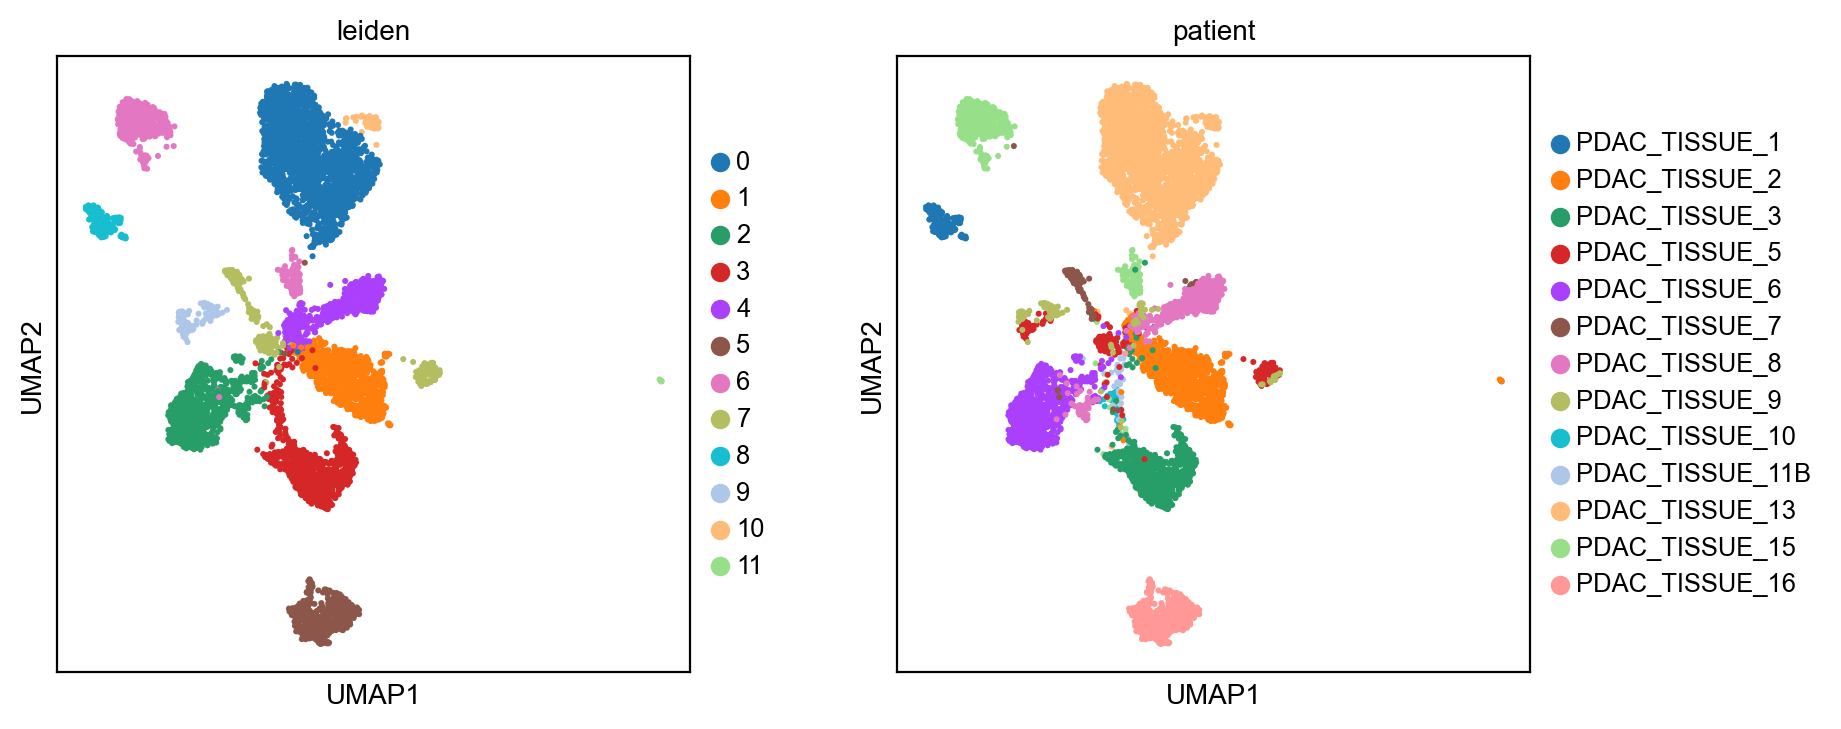

In [56]:
sc.pl.umap(adata, color=["leiden","patient"],ncols=2)

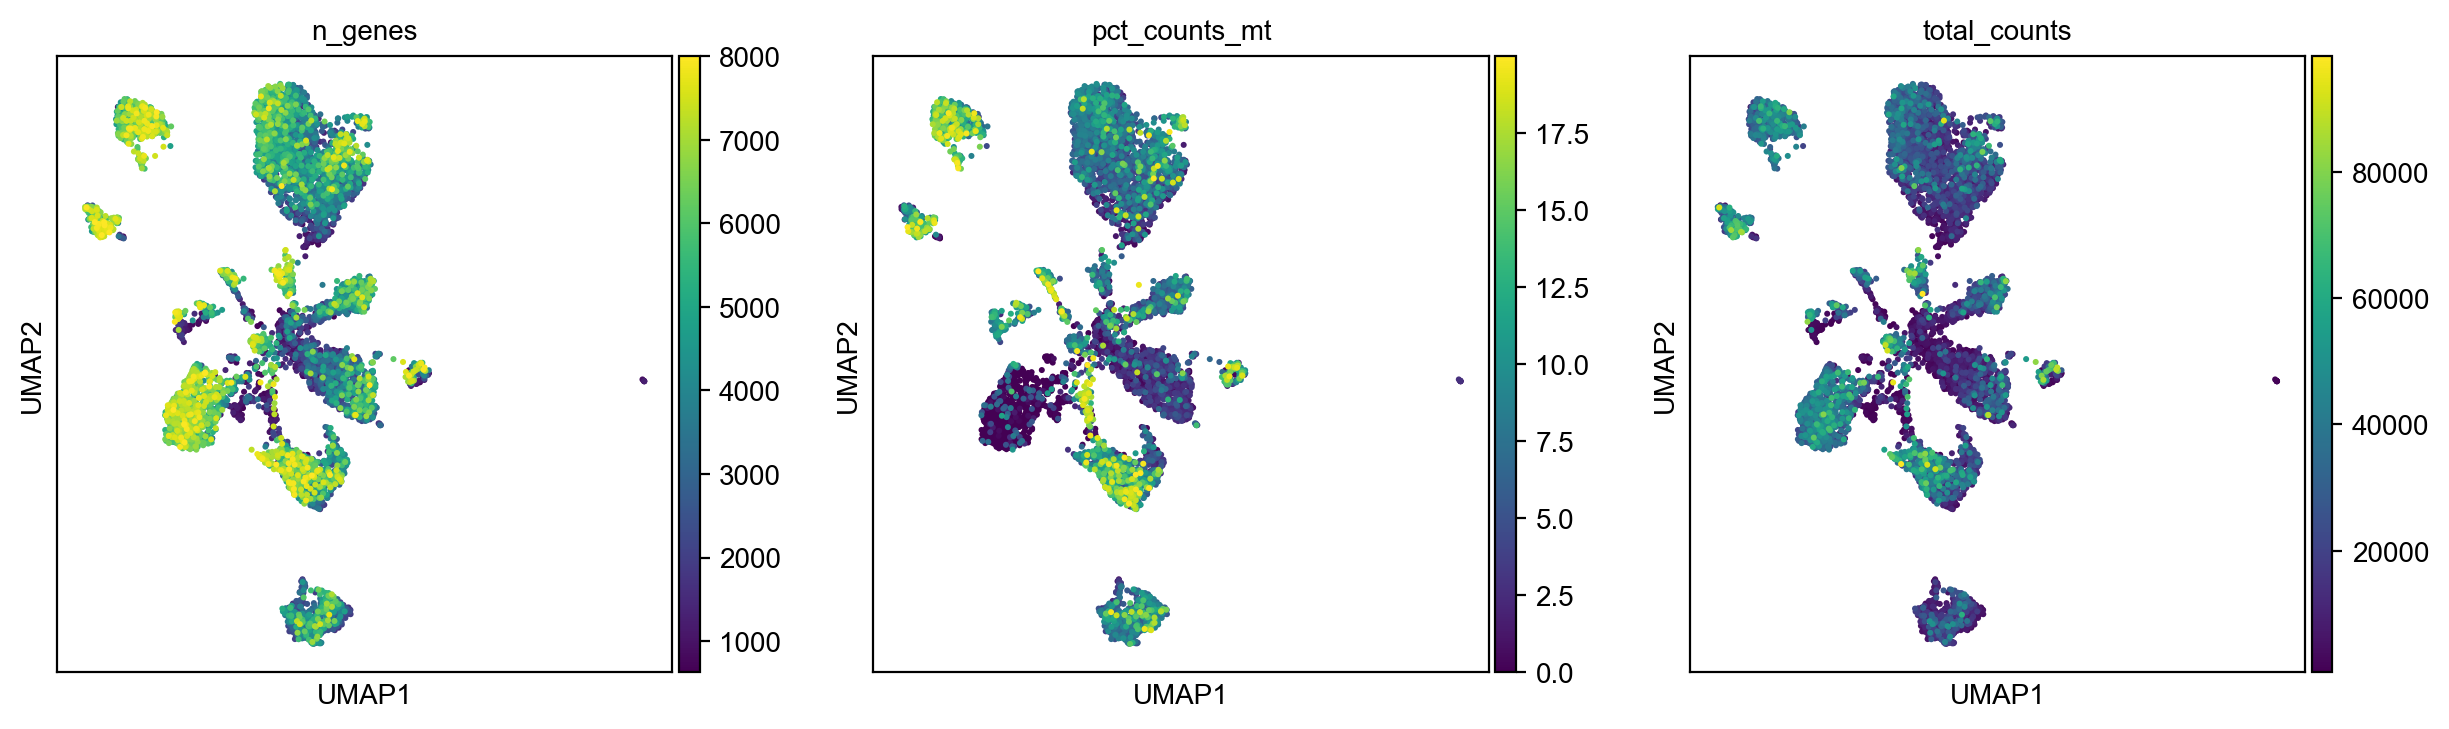

In [57]:
sc.pl.umap(adata, color=["n_genes","pct_counts_mt","total_counts"])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


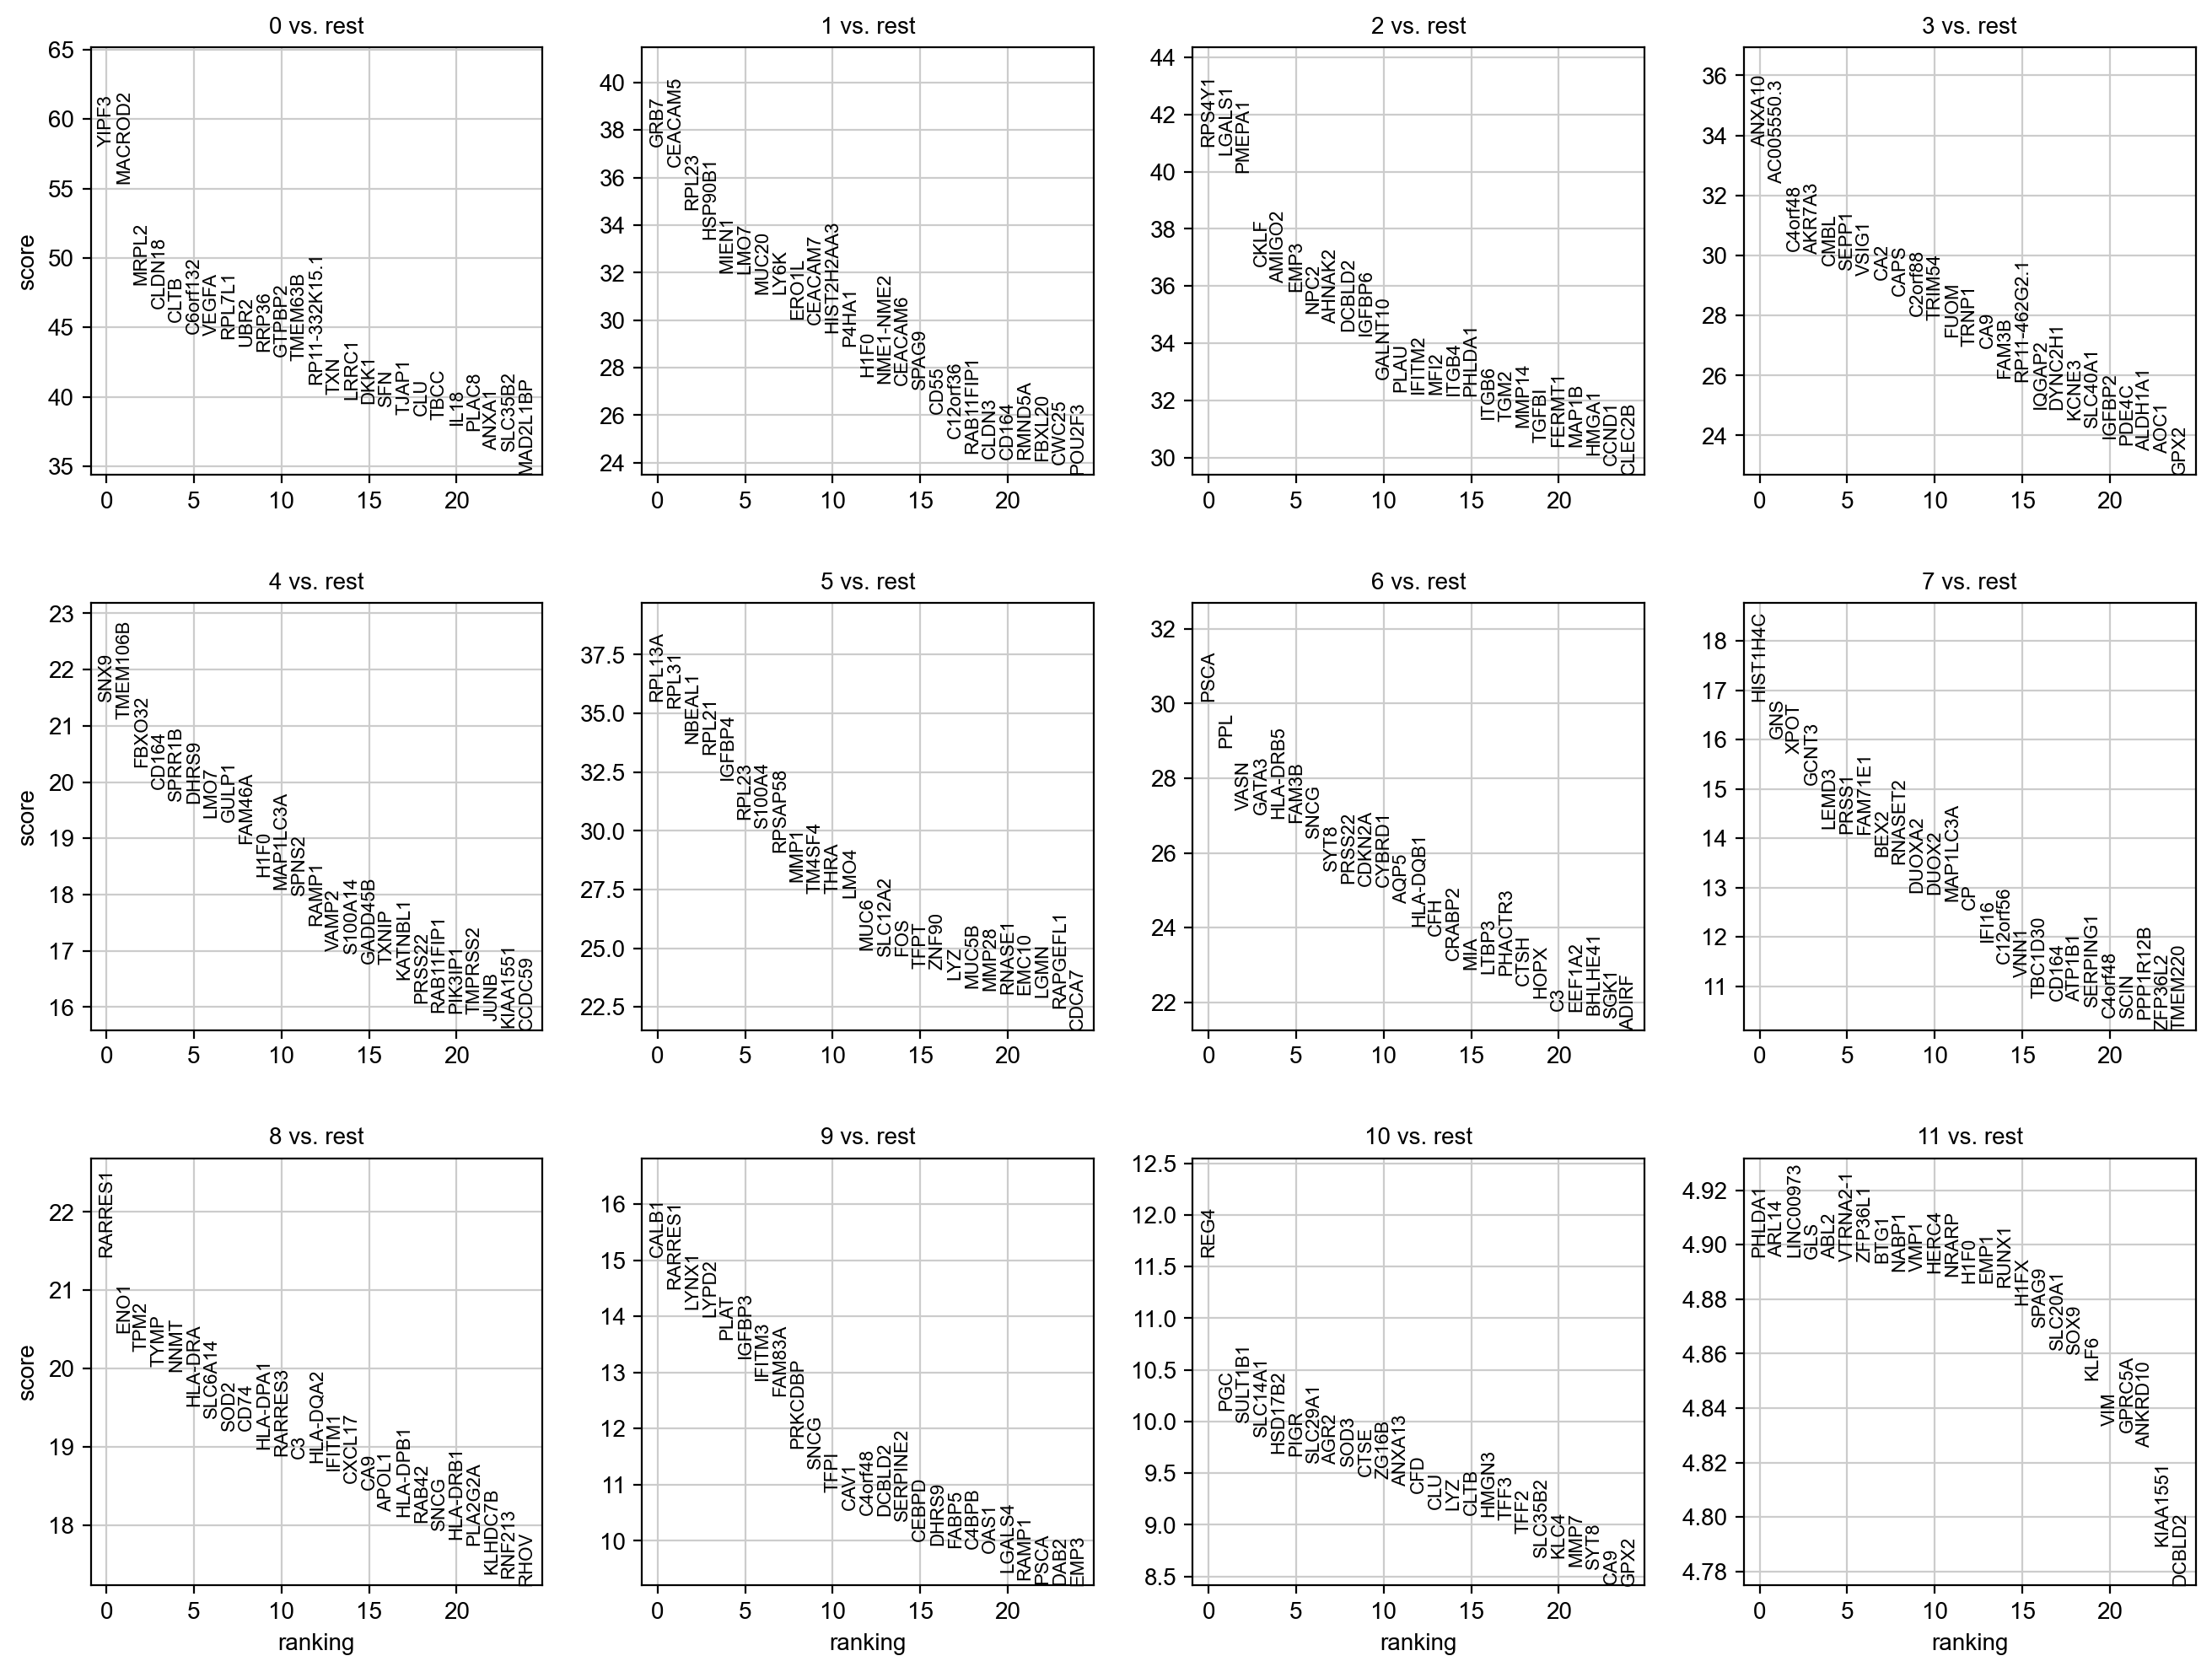

In [58]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
#sc.tl.filter_rank_genes_groups(adata, groupby="leiden", use_raw=False,
#                                   key_added='rank_genes_groups_filtered', 
#                                   min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5, compare_abs=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [59]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

,0,1,2,3,4,5,6,7,8,9,10,11
0,YIPF3,GRB7,RPS4Y1,ANXA10,SNX9,RPL13A,PSCA,HIST1H4C,RARRES1,CALB1,REG4,PHLDA1
1,MACROD2,CEACAM5,LGALS1,AC005550.3,TMEM106B,RPL31,PPL,GNS,ENO1,RARRES1,PGC,ARL14
2,MRPL2,RPL23,PMEPA1,C4orf48,FBXO32,NBEAL1,VASN,XPOT,TPM2,LYNX1,SULT1B1,LINC00973
3,CLDN18,HSP90B1,CKLF,AKR7A3,CD164,RPL21,GATA3,GCNT3,TYMP,LYPD2,SLC14A1,GLS
4,CLTB,MIEN1,AMIGO2,CMBL,SPRR1B,IGFBP4,HLA-DRB5,LEMD3,NNMT,PLAT,HSD17B2,ABL2
5,C6orf132,LMO7,EMP3,SEPP1,DHRS9,RPL23,FAM3B,PRSS1,HLA-DRA,IGFBP3,PIGR,VTRNA2-1
6,VEGFA,MUC20,NPC2,VSIG1,LMO7,S100A4,SNCG,FAM71E1,SLC6A14,IFITM3,SLC29A1,ZFP36L1
7,RPL7L1,LY6K,AHNAK2,CA2,GULP1,RPSAP58,SYT8,BEX2,SOD2,FAM83A,AGR2,BTG1
8,UBR2,ERO1L,DCBLD2,CAPS,FAM46A,MMP1,PRSS22,RNASET2,CD74,PRKCDBP,SOD3,NABP1
9,RRP36,CEACAM7,IGFBP6,C2orf88,H1F0,TM4SF4,CDKN2A,DUOXA2,HLA-DPA1,SNCG,CTSE,VMP1


    using 'X_pca' with n_pcs = 40
Storing dendrogram info using `.uns['dendrogram_leiden']`


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What

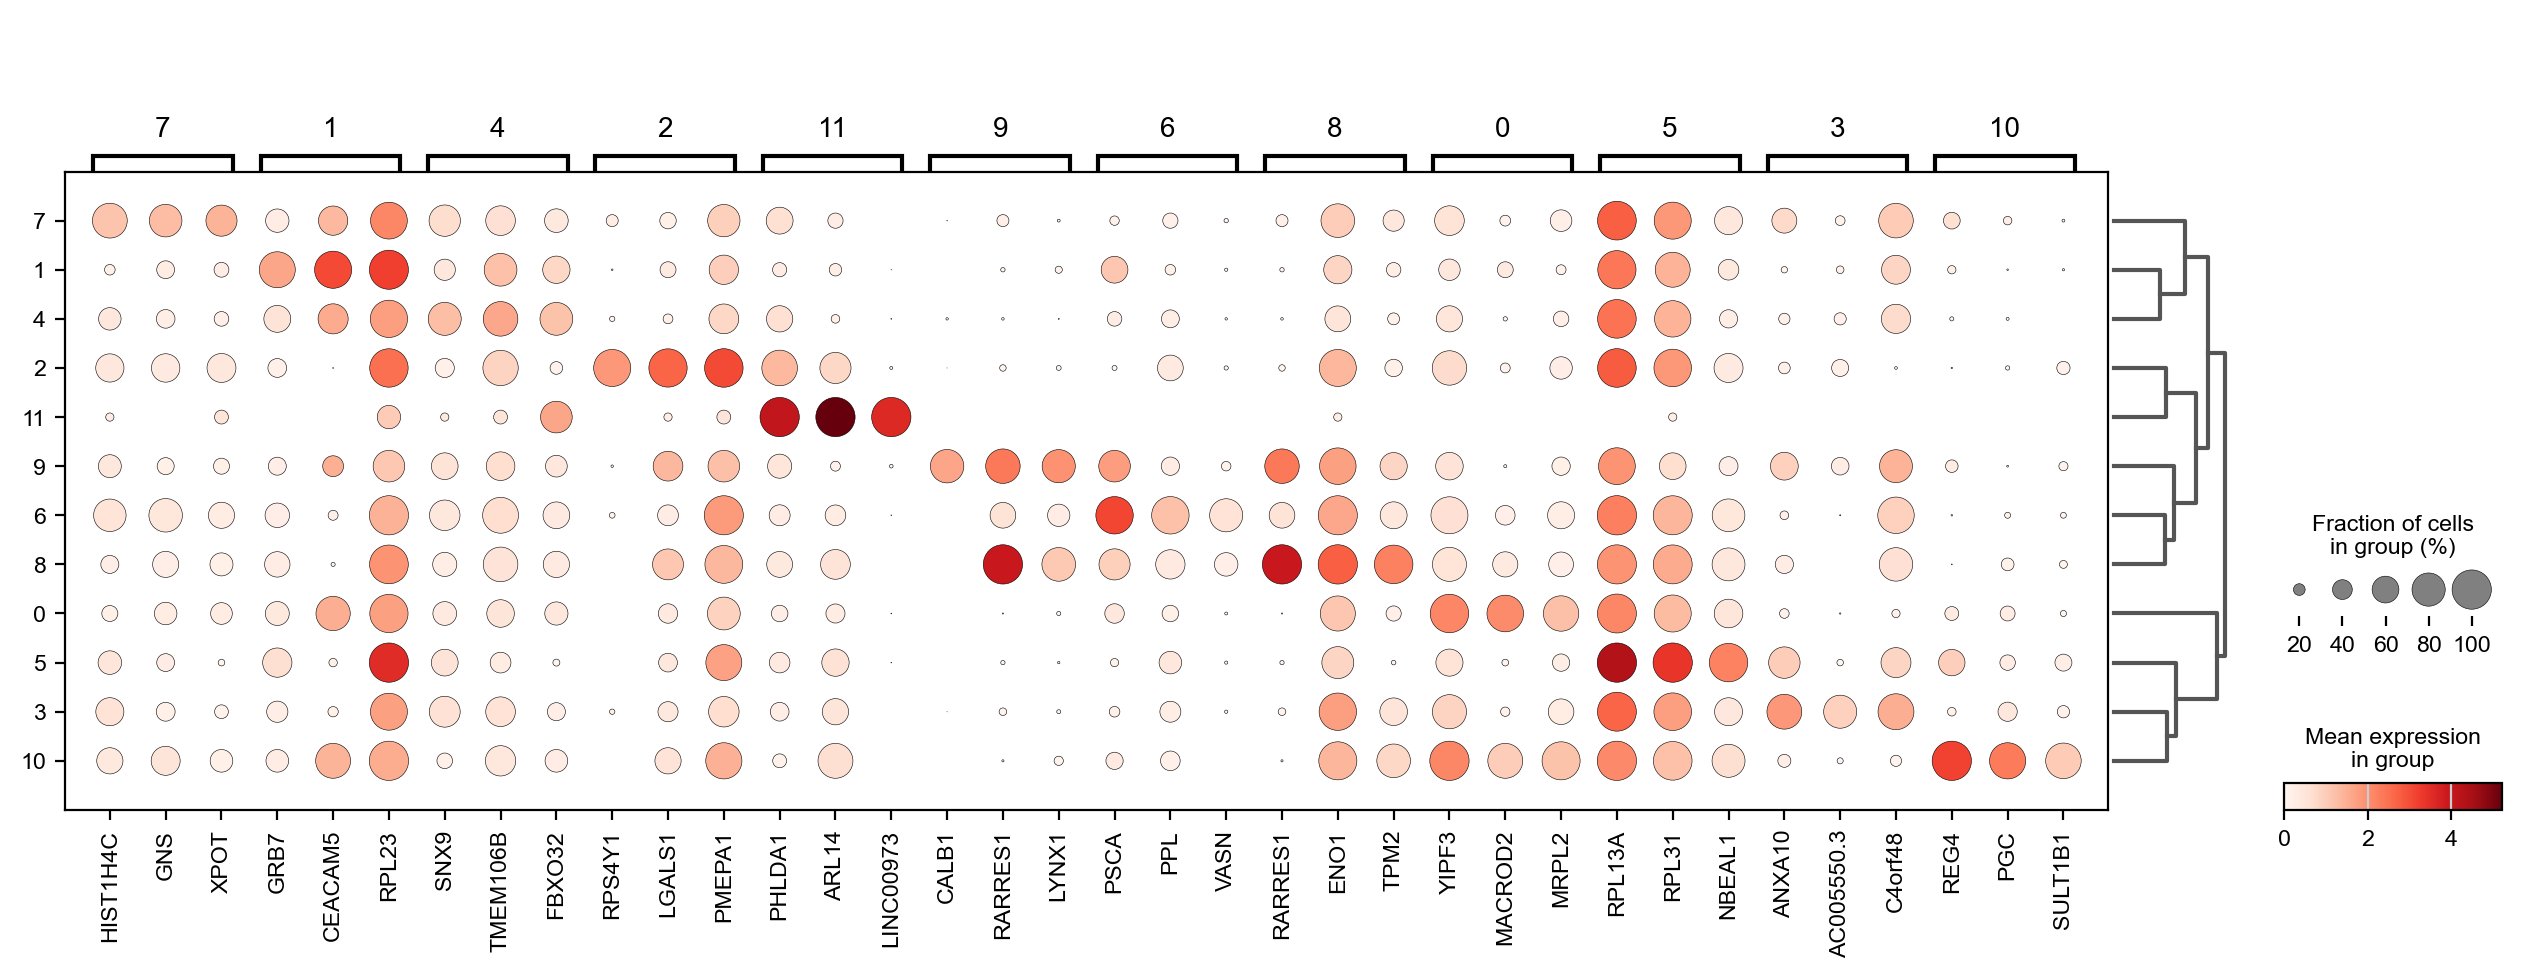

In [60]:
sc.tl.dendrogram(adata,groupby="leiden", n_pcs=40)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)#,key="rank_genes_groups_filtered")

In [61]:
sigFile = "geneSigs/simpLUADcs.csv"
sigGenes = pd.read_csv(sigFile)
hpcs = sigGenes["HPCS"]

In [62]:
sc.tl.score_genes(adata, hpcs, score_name="HPCS_score")

computing score 'HPCS_score'
    finished: added
    'HPCS_score', score of gene set (adata.obs).
    940 total control genes are used. (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

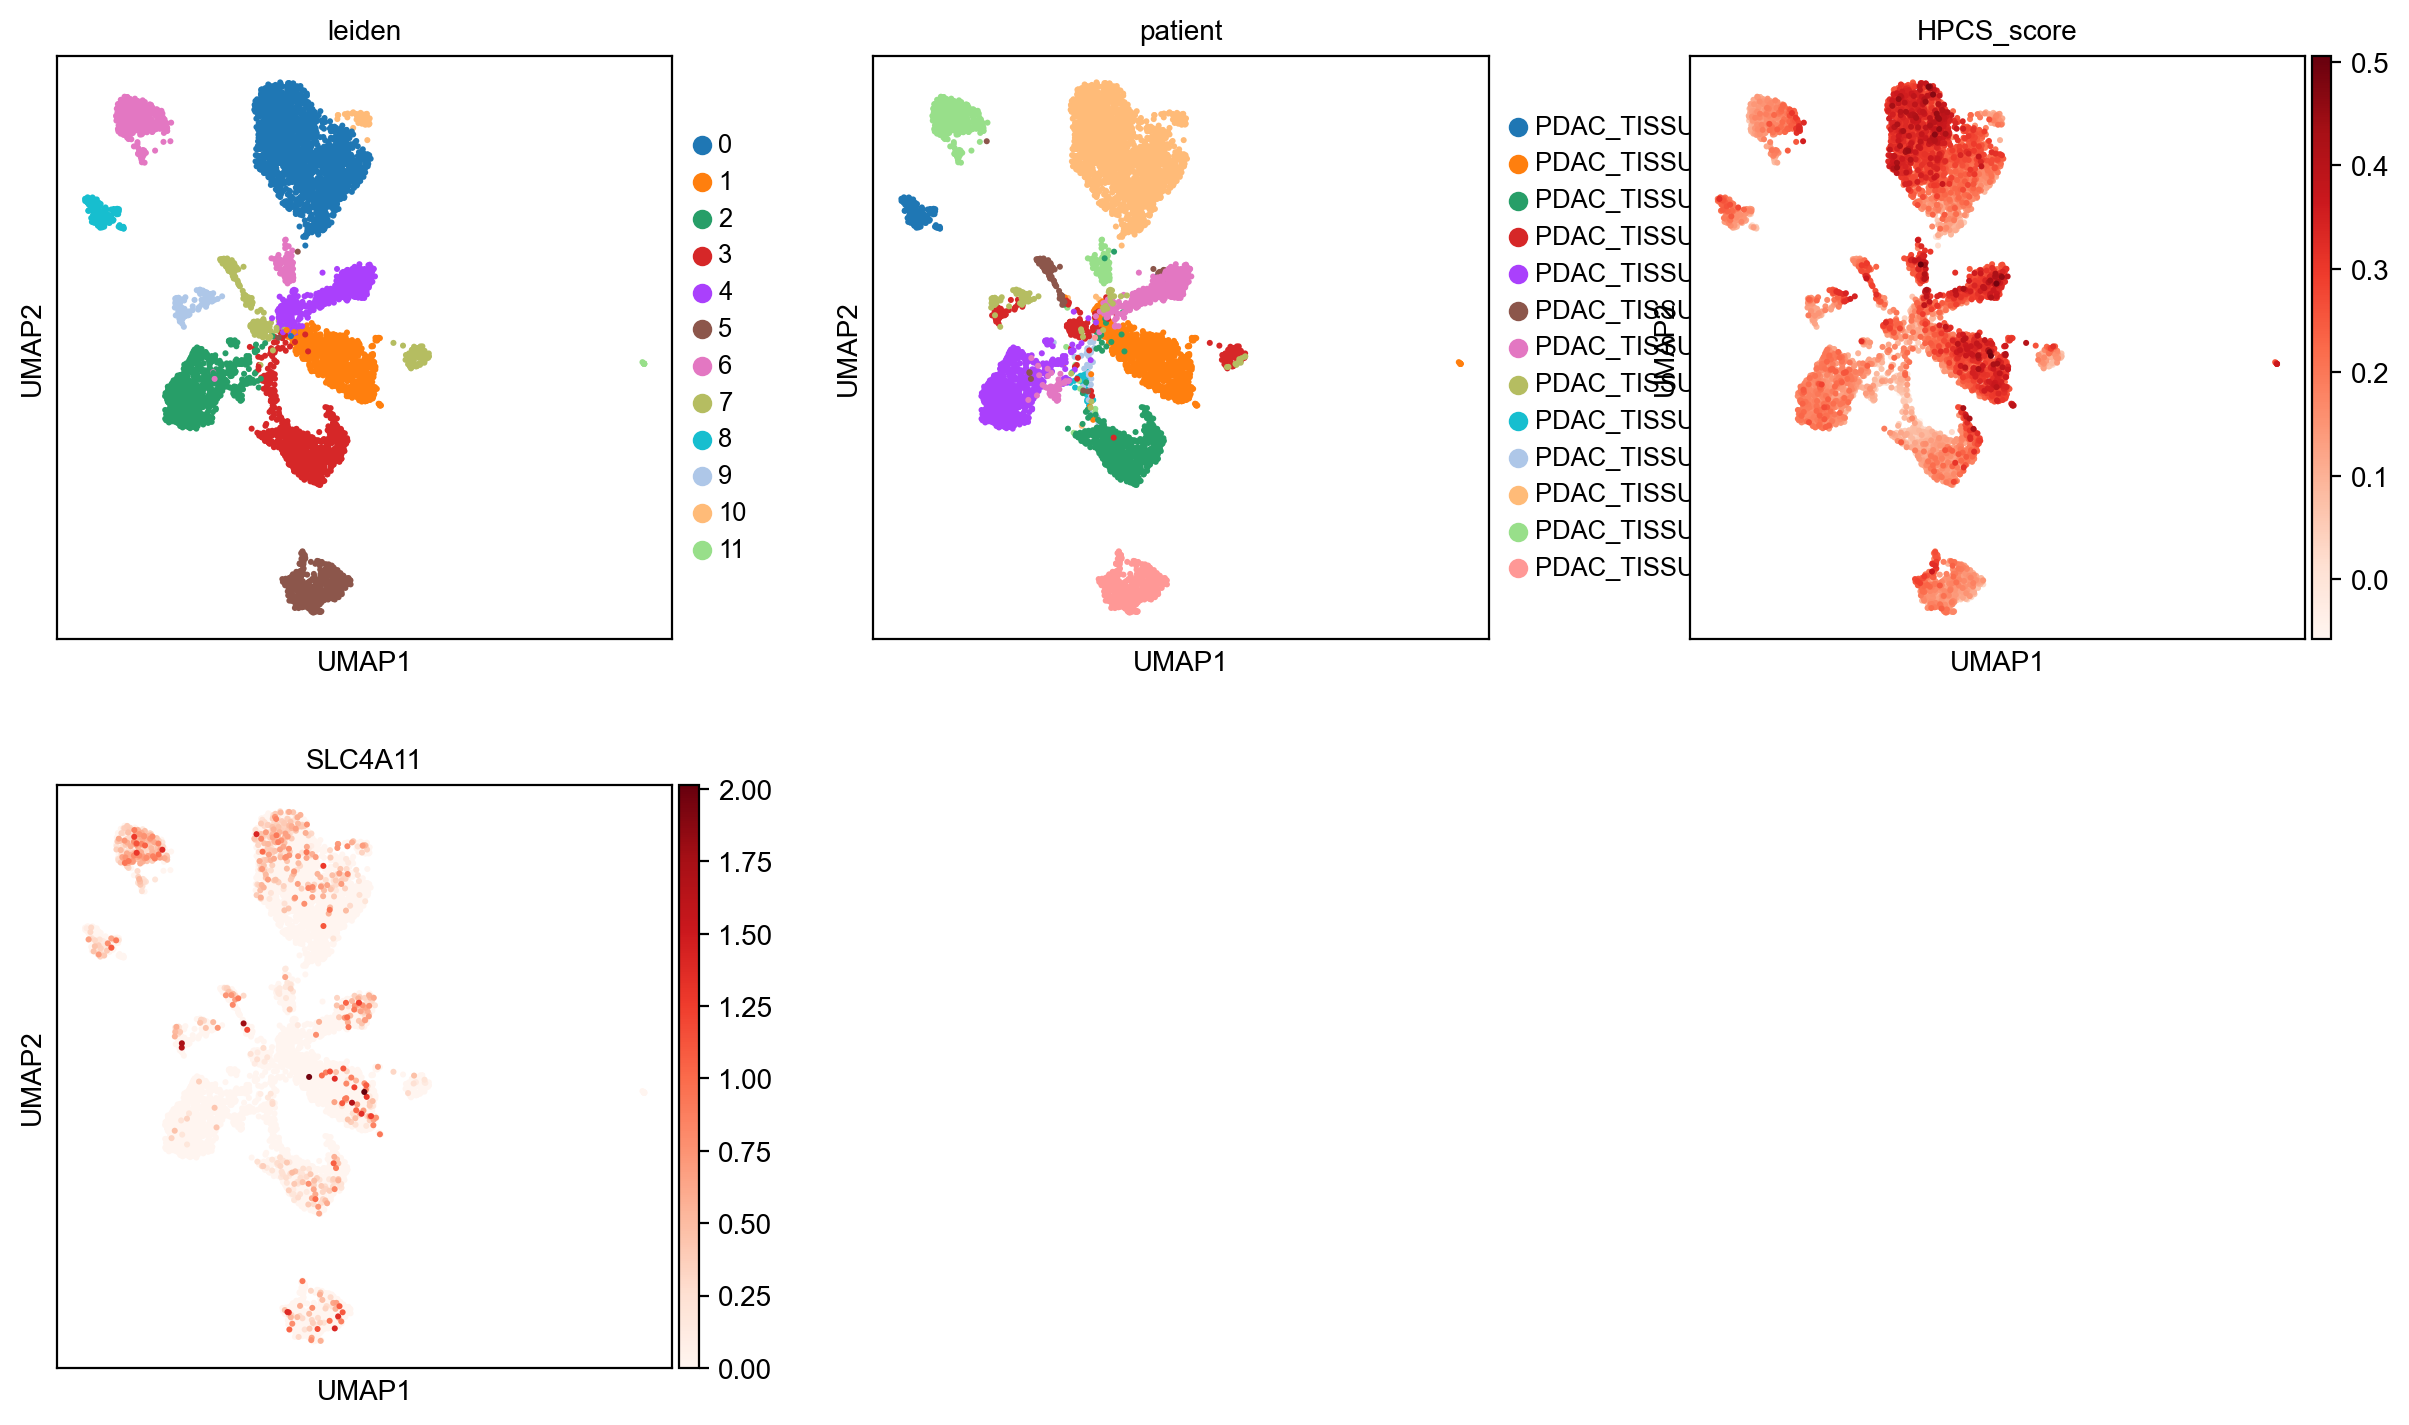

In [63]:
sc.pl.umap(adata, color=["leiden","patient","HPCS_score","SLC4A11"],ncols=3, cmap="Reds")

In [65]:
resultsFile

'write/Steele2020_Pancreas.h5ad'

In [66]:
adata.write(resultsFile)
adata

AnnData object with n_obs × n_vars = 6346 × 1861
    obs: 'sample', 'cell_type', 'complexity', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'patient', 'HPCS_score'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'patient_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'